In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [2]:
phone_number_df = pd.read_csv("data\phone_numbers_dataset.csv")
display(phone_number_df.head())

,image_id,phone_number
0,phoneNumberImage0.png,6420513217
1,phoneNumberImage1.png,529750676
2,phoneNumberImage2.png,1129451587
3,phoneNumberImage3.png,1889324881
4,phoneNumberImage4.png,8296078985


In [3]:
phone_number_images_path = "data\phone_number_images\\"

| OPERATION | Before | After |
| -------- | ------- | ----- |
| Original Image | 

![OriginalImage](sample_Images\OriginalImage.png)

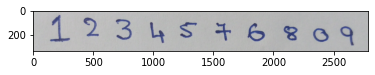

Image pixel values: {30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 228, 229}

phone number in image: 676216091


In [4]:
img = plt.imread("data\Real_World_Data\i4.jpg")
img_pixels = set(img.flatten())
image_phone_number = phone_number_df.loc[10, 'phone_number']
fig = plt.figure()
plt.imshow(img)
plt.show()
fig.savefig("data\sample_Images\OriginalImage.png")
print(f"Image pixel values: {img_pixels}\n")
print(f"phone number in image: {image_phone_number}")

### Converting image to gray scale

In [5]:
def image_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

shape of original image: (335, 2786, 3)
original image: 


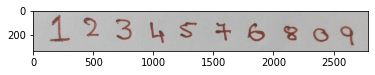

shape of gray scale image: (335, 2786)
Gray scale image: 


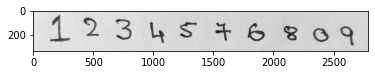

In [6]:
img = cv2.imread("data\Real_World_Data\i4.jpg")
print(f"shape of original image: {img.shape}")
print("original image: ")
plt.imshow(img)
plt.show()
img = image_to_grayscale(img)
print(f"shape of gray scale image: {img.shape}")
print("Gray scale image: ")
plt.imshow(img, cmap='gray')
plt.show()

## Inverting image pixels

In [7]:
def invertingBlackAndWhite(img): # only for real world image not for training
    return 255 - img

Before inverting: 


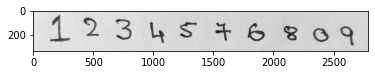

After inverting: 


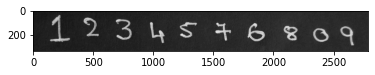

In [8]:
print("Before inverting: ")
plt.imshow(img, cmap='gray')
plt.show()
img = invertingBlackAndWhite(img)
print("After inverting: ")
plt.imshow(img, cmap='gray')
plt.show()

### Gray scale image to Binary image

In [9]:
def grayscale_to_binaryimage(img):
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

Gray scale image: 


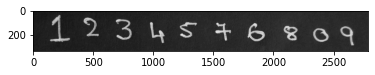

Binary image: 


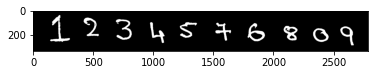

binary image pixels: {0, 255}


In [10]:
print("Gray scale image: ")
plt.imshow(img, cmap='gray')
plt.show()
_, img = grayscale_to_binaryimage(img)
binary_image_pixels = set(img.flatten())
print("Binary image: ")
plt.imshow(img, cmap='gray')
plt.show()
print(f"binary image pixels: {binary_image_pixels}")

### applying dilation

In [11]:
def applying_dilation(img):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

binary image: 


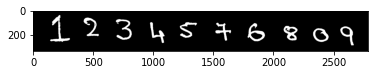

Binary image after applying dilation: 


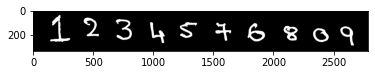

In [12]:
print("binary image: ")
plt.imshow(img, cmap='gray')
plt.show()
img = applying_dilation(img)
print("Binary image after applying dilation: ")
plt.imshow(img, cmap='gray')
plt.show()

### Binary Image to Median filter

In [13]:
def applying_median_filter(img):
    return cv2.medianBlur(img, 3)

dilated binary image: 


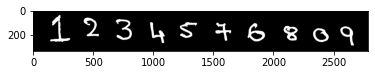

dilated binary image after applying median filter: 


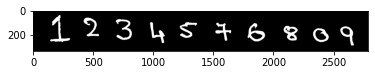

In [14]:
print("dilated binary image: ")
plt.imshow(img, cmap='gray')
plt.show()
img = applying_median_filter(img)
print("dilated binary image after applying median filter: ")
plt.imshow(img, cmap='gray')
plt.show()

### applying erosion

In [15]:
def applying_erosion(img):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

After applying median filter: 


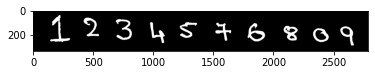

applying erosion: 


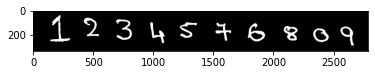

In [16]:
print("After applying median filter: ")
plt.imshow(img, cmap='gray')
plt.show()
img = applying_erosion(img)
print("applying erosion: ")
plt.imshow(img, cmap='gray')
plt.show()

### Bounding boxes

In [17]:
# contours, heirarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# contours_poly = [None] * len(contours)
# bound_rect = []

# for i, c in enumerate(contours):
#     if heirarchy[0][i][3] == -1:
#         contours_poly[i] = cv2.approxPolyDP(c, 3, True)
#         bound_rect.append(cv2.boundingRect(contours_poly[i]))

# for i in range(len(bound_rect)):
#     color = (255, 0)
#     cv2.rectangle(img, (int(bound_rect[i][0]), int(bound_rect[i][1])), 
#               (int(bound_rect[i][0] + bound_rect[i][2]), int(bound_rect[i][1] + bound_rect[i][3])), color, 1)
# plt.imshow(img, cmap="gray")
# plt.show()


In [18]:
def bounding_boxes(img):
    contours, heirarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    contours_poly = [None] * len(contours)
    bound_rect = []

    for i, c in enumerate(contours):
        if heirarchy[0][i][3] == -1:
            contours_poly[i] = cv2.approxPolyDP(c, 3, True)
            bound_rect.append(cv2.boundingRect(contours_poly[i]))

    for i in range(len(bound_rect)):
        color = (255, 0)
        cv2.rectangle(img, (int(bound_rect[i][0]), int(bound_rect[i][1])), 
              (int(bound_rect[i][0] + bound_rect[i][2]), int(bound_rect[i][1] + bound_rect[i][3])), color, 1)
    return img, bound_rect

In [19]:
img1, _ = bounding_boxes(img.copy())

In [20]:
print(len(_))

11


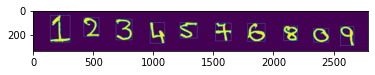

In [21]:
plt.imshow(img1)
plt.show()

In [22]:
# print(_)

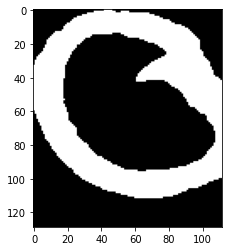

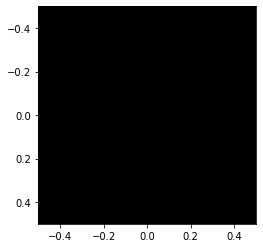

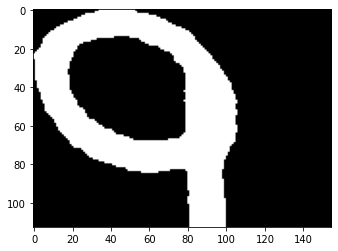

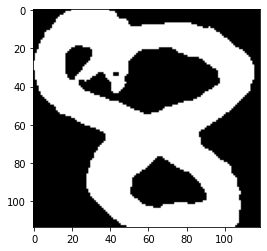

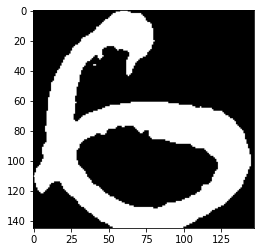

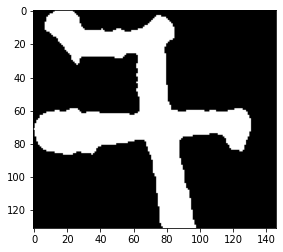

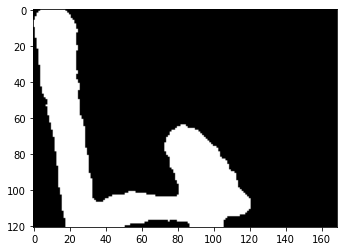

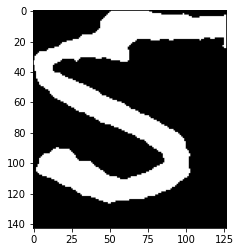

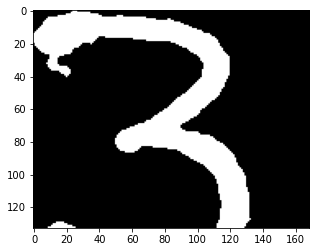

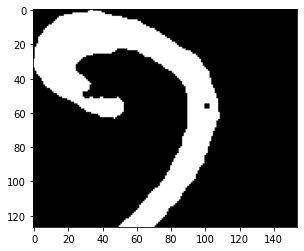

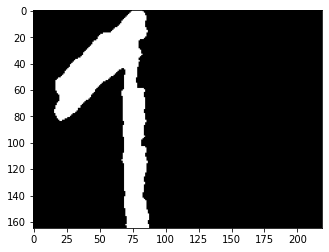

In [23]:
for k in _:
    x, y, h, w = k
    crop_img = img[int(y) : int(y + h), int(x) : int(x + w)]
    plt.imshow(crop_img, cmap='gray')
    plt.show()